### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('sample_data/coupons.csv') #loaded the data frame into the interface

In [3]:
data.head() #making sense of the data and what I am looking at

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:

data.sample(10) #sample data load to get a broader idea of the data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10656,Home,Partner,Rainy,55,6PM,Coffee House,1d,Male,21,Unmarried partner,...,1~3,4~8,4~8,1~3,1,0,0,1,0,0
12123,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Female,36,Married partner,...,1~3,4~8,4~8,4~8,1,1,1,0,1,0
4118,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,1d,Male,31,Married partner,...,never,1~3,1~3,never,1,1,0,0,1,0
1999,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Married partner,...,never,4~8,4~8,1~3,1,1,0,0,1,1
620,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,1,0,0,1,0
10746,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Female,41,Married partner,...,gt8,4~8,4~8,4~8,1,0,0,0,1,1
5650,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,36,Single,...,4~8,4~8,1~3,less1,1,1,1,0,1,0
9412,Home,Alone,Sunny,30,6PM,Restaurant(20-50),1d,Female,50plus,Divorced,...,never,4~8,1~3,less1,1,0,0,1,0,0
4464,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,36,Single,...,never,4~8,1~3,less1,1,0,0,0,1,0
6358,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,21,Married partner,...,4~8,4~8,4~8,4~8,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum() #data below shows the column with missing data and the number of open cases

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# I initially used .dropna(), removed empty data, which would make sense. However, the data was not making sense as the probem progressed. Instead of doing that, I willfill the empty data with my own dataand track it.
data.fillna("NA")
data.sample(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
692,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,36,Married partner,...,1~3,4~8,1~3,1~3,1,0,0,0,1,0
2548,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,26,Single,...,4~8,4~8,4~8,less1,1,0,0,0,1,1
10778,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,31,Single,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
8947,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,31,Married partner,...,4~8,4~8,less1,less1,1,0,0,1,0,1
7639,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,50plus,Unmarried partner,...,1~3,4~8,4~8,1~3,1,1,1,0,1,0
10275,No Urgent Place,Friend(s),Sunny,55,10AM,Restaurant(<20),2h,Female,50plus,Single,...,less1,4~8,1~3,less1,1,1,0,0,1,1
509,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,1
3948,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Married partner,...,1~3,1~3,1~3,1~3,1,1,1,0,1,0
4840,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Female,21,Single,...,1~3,4~8,1~3,never,1,0,0,1,0,0
5616,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,less1,1,0,0,1,0,1


4. What proportion of the total observations chose to accept the coupon?



In [7]:
acceptance_rate = data["Y"].mean()   # I am focusing on capturing the accepted coupons count in column "Y" = 1
print(f"The acceptance rate is {acceptance_rate * 100:.2f}%")   # The output makes sense in a percentage format. Not sure how to count only 2 decimals after the "."

The acceptance rate is 56.84%


5. Use a bar plot to visualize the `coupon` column.

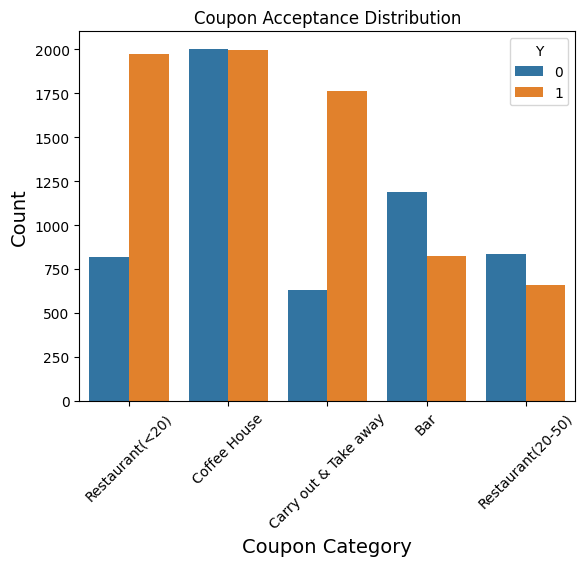

In [8]:
sns.countplot(x="coupon", data=data, hue="Y") #Seaborn is used here to plot the coupon categories and visualising the ratio between the accepted and the denied coupons
plt.title("Coupon Acceptance Distribution")
plt.xlabel("Coupon Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

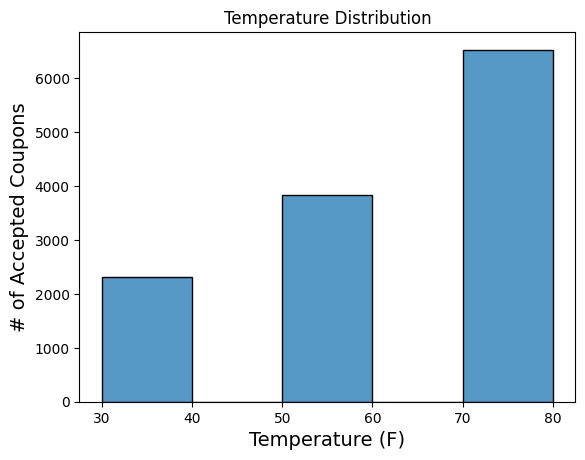

In [9]:
sns.histplot(data["temperature"], bins = 5, kde= False) #The temperature is divided in a reasonable Cold, Warm, Hot weather bins.
plt.title("Temperature Distribution")
plt.xlabel("Temperature (F)", fontsize=14)
plt.ylabel("# of Accepted Coupons", fontsize=14)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_coupons = data[data["coupon"] == "Bar"]  # Within the data frame, I will single out the Bar values in the coupons column.
bar_coupons.head(50) # I need to preview the first 50 lines of the data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


The acceptance rate for bar coupons is 41.00%


<ipython-input-12-2b06ddd6ab8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Y", data=bar_coupons, palette="Blues") #Fixed hue parameter


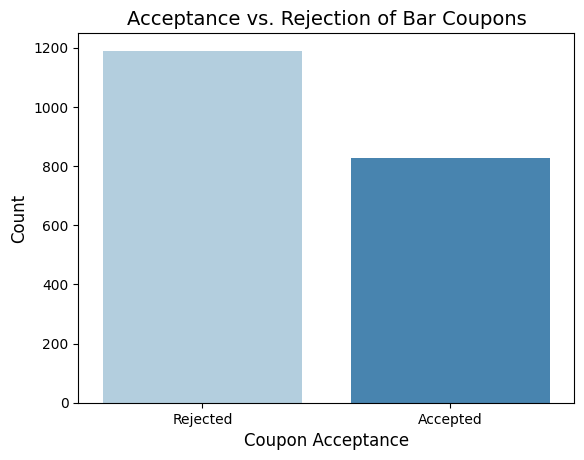

In [12]:
bar_acceptance_rate = bar_coupons["Y"].mean() # Same approach as question 4 about the acceptance rate
bar_acceptance_rate = bar_coupons["Y"].mean() # Same approach as question 4 about the acceptance rate
print(f"The acceptance rate for bar coupons is {bar_acceptance_rate * 100:.2f}%")

sns.countplot(x="Y", data=bar_coupons, palette="Blues") #Fixed hue parameter
plt.title("Acceptance vs. Rejection of Bar Coupons", fontsize=14)
plt.xlabel("Coupon Acceptance", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Rejected', 'Accepted'], rotation=0)
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# The data in the file is listed as one of the follwoing (never, less1, 1~3, 4~8, gt8)
bar_coupons.loc[bar_coupons["Bar"].isin(["never", "less1", "1~3"]), "bar_visit_group"] = "Low (≤3)"
bar_coupons.loc[bar_coupons["Bar"].isin(["4~8", "gt8", " "]), "bar_visit_group"] = "High (>3)"

# I now will create 2 separate DataFrames
low_visitors = bar_coupons[bar_coupons["bar_visit_group"] == "Low (≤3)"]
high_visitors = bar_coupons[bar_coupons["bar_visit_group"] == "High (>3)"]

<ipython-input-13-c72d691816b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons.loc[bar_coupons["Bar"].isin(["never", "less1", "1~3"]), "bar_visit_group"] = "Low (≤3)"


<ipython-input-14-76be5b7537f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x="bar_visit_group", y="Y", palette="coolwarm")


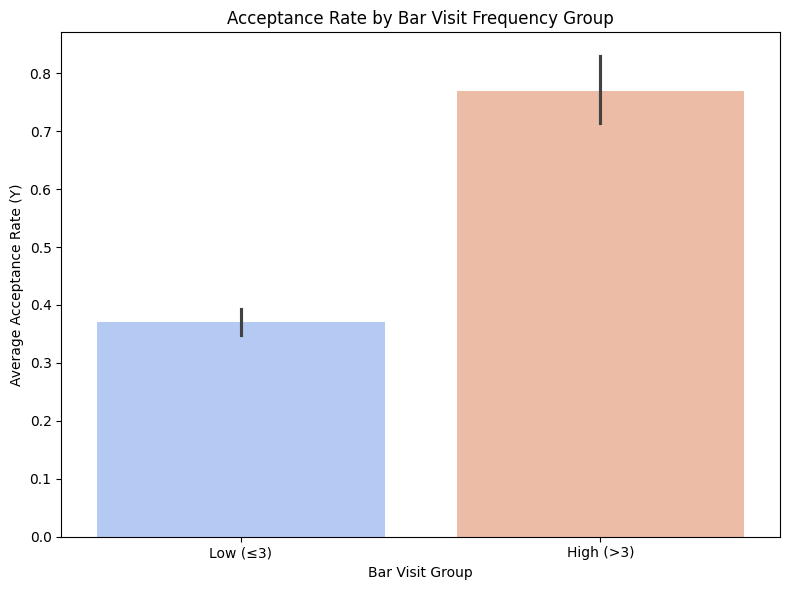

In [14]:
combined = pd.concat([low_visitors, high_visitors])

# Create a boxplot or barplot to compare acceptance rate
plt.figure(figsize=(8, 6))
sns.barplot(data=combined, x="bar_visit_group", y="Y", palette="coolwarm")

plt.title("Acceptance Rate by Bar Visit Frequency Group")
plt.xlabel("Bar Visit Group")
plt.ylabel("Average Acceptance Rate (Y)")
plt.tight_layout()
plt.show()

In [15]:
low_acceptance_rate = low_visitors["Y"].mean() * 100
print(f"Low visitors acceptance rate: {low_acceptance_rate:.2f}%")

high_acceptance_rate = high_visitors["Y"].mean() * 100
print(f"High visitors acceptance rate: {high_acceptance_rate:.2f}%")


Low visitors acceptance rate: 37.06%
High visitors acceptance rate: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
data.groupby(["Bar", "passanger"], as_index = False)["Y"].mean().round(2)

,Bar,passanger,Y
0,1~3,Alone,0.58
1,1~3,Friend(s),0.72
2,1~3,Kid(s),0.60
3,1~3,Partner,0.64
4,4~8,Alone,0.60
5,4~8,Friend(s),0.71
6,4~8,Kid(s),0.59
7,4~8,Partner,0.65
8,gt8,Alone,0.55
9,gt8,Friend(s),0.59


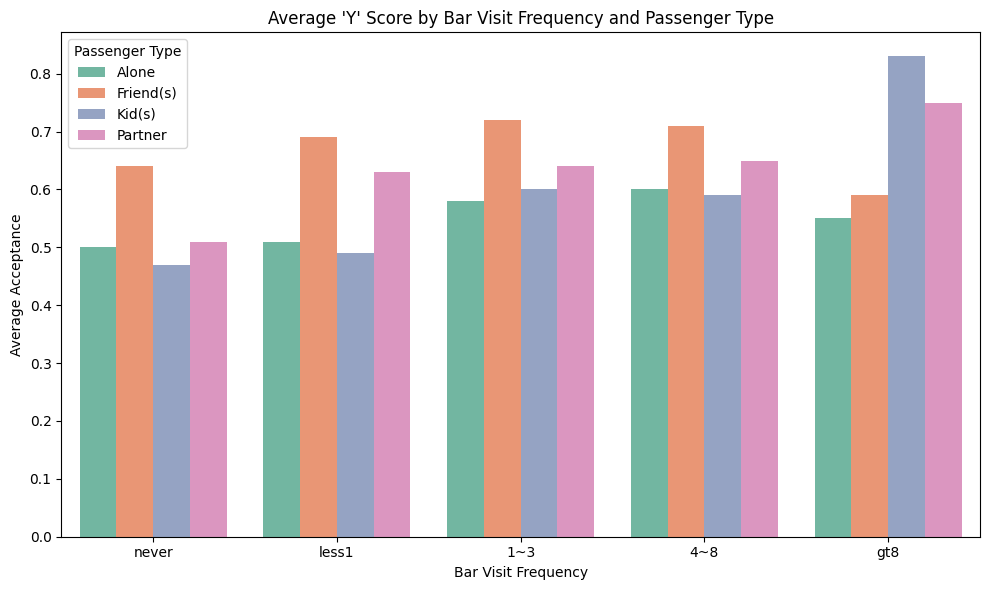

In [16]:
grouped = data.groupby(["Bar", "passanger"], as_index=False)["Y"].mean().round(2)

bar_order = ["never", "less1", "1~3", "4~8", "gt8"]

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x="Bar", y="Y", hue="passanger", order=bar_order, palette="Set2")

plt.title("Average 'Y' Score by Bar Visit Frequency and Passenger Type")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Average Acceptance")
plt.legend(title="Passenger Type")
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [17]:
filtered_data = data[(data["Bar"].isin(["1~3", "4~8", "gt8"])) &  # Bar visits > 1/month
    (~data["passanger"].isin(["Kid(s)"])) &  # Exclude 'Kid(s)' passengers
    (~data["occupation"].isin(["Farming Fishing & Forestry"]))  # Exclude specific occupations
]

grouped_data = data.groupby(["Bar", "passanger"], as_index=False)["Y"].mean().round(2)

bar_order = ["1~3", "4~8", "gt8"]

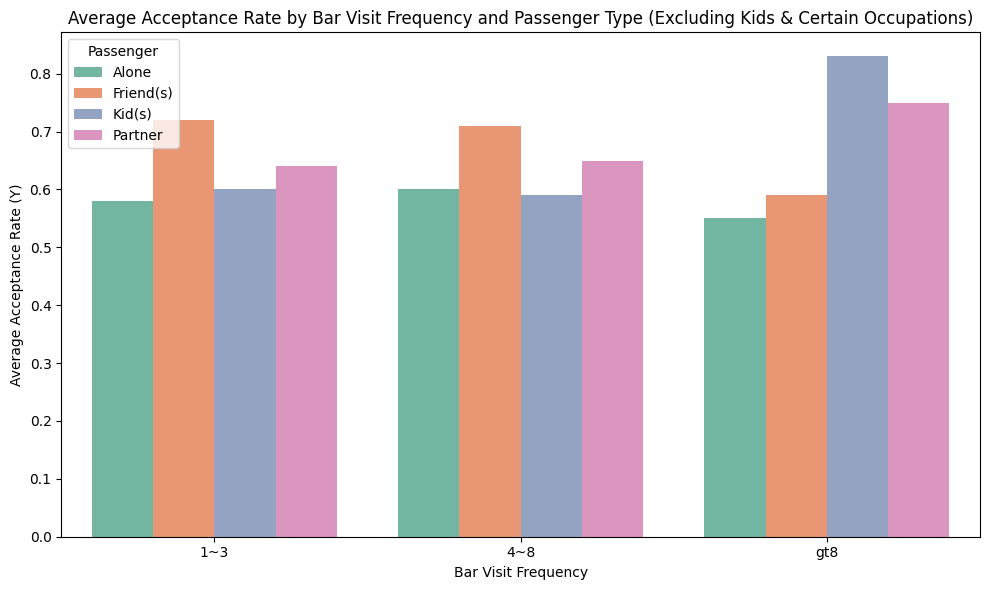

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x="Bar", y="Y", hue="passanger", order=bar_order, palette="Set2")

plt.title("Average Acceptance Rate by Bar Visit Frequency and Passenger Type (Excluding Kids & Certain Occupations)")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Average Acceptance Rate (Y)")
plt.legend(title="Passenger")
plt.tight_layout()
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [19]:
group1 = ((data["Bar"].isin(["1~3", "4~8", "gt8"])) & (~data["passanger"].isin(["Kid(s)"])) & (~data["maritalStatus"].isin(["Widowed"])))
group2 = ((data["Bar"].isin(["1~3", "4~8", "gt8"])) & (data["age"].isin(["21", "26", "21-30"])))
group3 = ((data["RestaurantLessThan20"].isin(["4~8", "gt8"])) & (data["income"].isin(["$25 - $50K", "<$25K"])))

In [20]:
combined_filter = group1 | group2 | group3 # Combining all 3 groups using OR
target_group = data[combined_filter].copy()
acceptance_rate = target_group["Y"].mean().round(2)
print(f"Acceptance Rate for Target Group: {acceptance_rate}")

Acceptance Rate for Target Group: 0.62


<ipython-input-21-49d04f0d15f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_group, x="Bar", y="Y", estimator="mean", palette="Set2", order=["never", "less1", "1~3", "4~8", "gt8"])


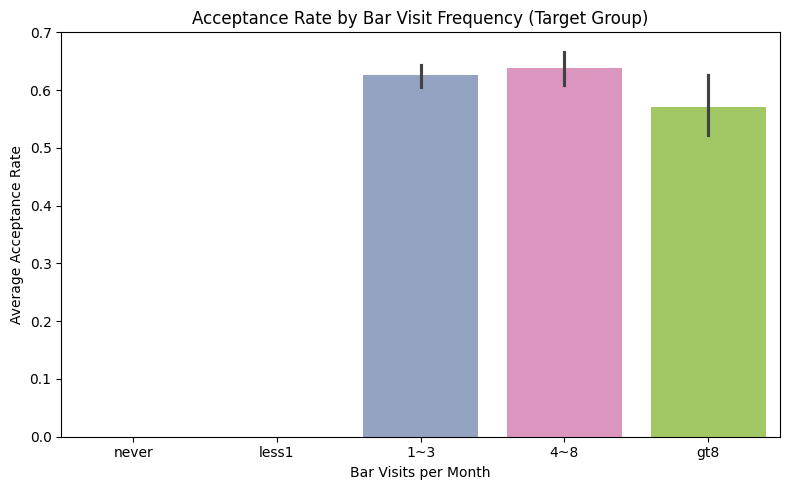

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(data=target_group, x="Bar", y="Y", estimator="mean", palette="Set2", order=["never", "less1", "1~3", "4~8", "gt8"])
plt.title("Acceptance Rate by Bar Visit Frequency (Target Group)")
plt.ylabel("Average Acceptance Rate")
plt.xlabel("Bar Visits per Month")
plt.tight_layout()
plt.show()

<ipython-input-22-ed2c9bf02731>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_group[~target_group["passanger"].isin(["Kid(s)"])],


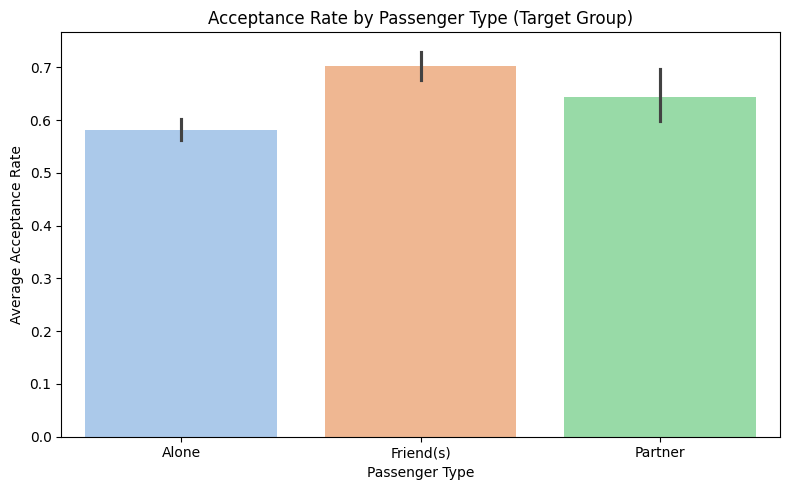

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=target_group[~target_group["passanger"].isin(["Kid(s)"])],
            x="passanger", y="Y", estimator="mean", palette="pastel")
plt.title("Acceptance Rate by Passenger Type (Target Group)")
plt.ylabel("Average Acceptance Rate")
plt.xlabel("Passenger Type")
plt.tight_layout()
plt.show()

<ipython-input-23-82f6f55867a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_group, x="income", y="Y", estimator="mean", palette="coolwarm")


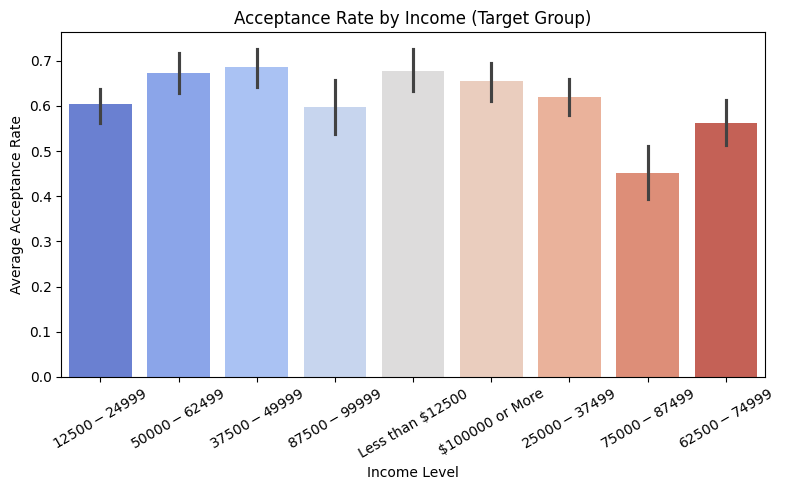

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=target_group, x="income", y="Y", estimator="mean", palette="coolwarm")
plt.title("Acceptance Rate by Income (Target Group)")
plt.ylabel("Average Acceptance Rate")
plt.xlabel("Income Level")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

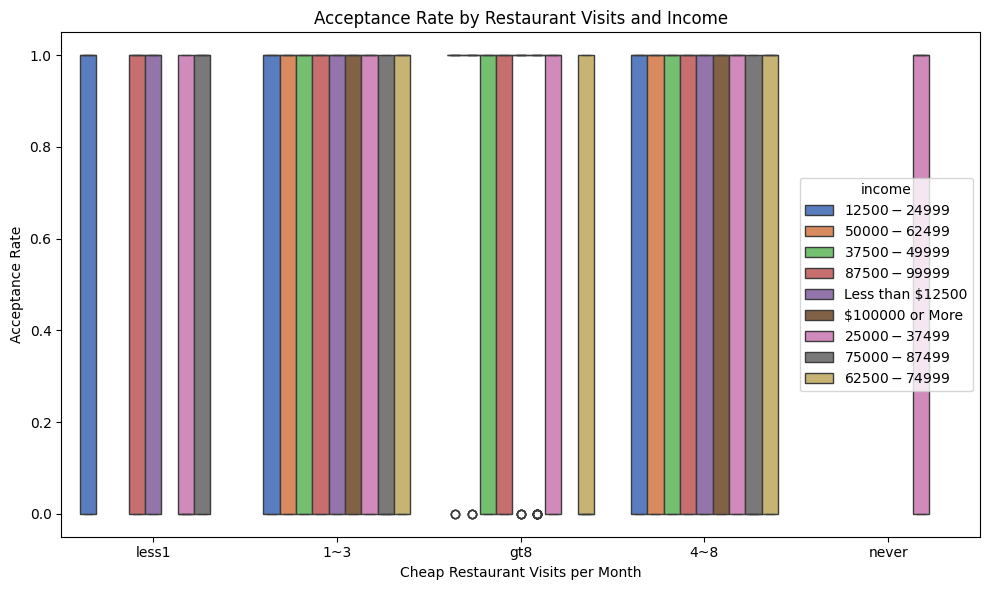

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=target_group, x="RestaurantLessThan20", y="Y", hue="income", palette="muted")
plt.title("Acceptance Rate by Restaurant Visits and Income")
plt.ylabel("Acceptance Rate")
plt.xlabel("Cheap Restaurant Visits per Month")
plt.tight_layout()
plt.show()
plt.savefig("acceptance_rate_by_restaurant_visits_and_income.png")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  